# Data import
import labeled dataset and cleans all rows that do not posses a label to this point

In [1]:
import pandas as pd


# Load your data
data = pd.read_excel('../../data/040524subset_studium_german.xlsx')

data.head()
# Get all rows that are non empty
cleanedData = data[data['Studium_Label'].notnull()]
cleanedData.head()

,Unnamed: 0,Studium,Studium_Label,Studium_Comment
0,0,Die Vorlesungszeit war von Anfang September bi...,neutral,"Lernaufwand konstant hoch, Sprachniveau angeme..."
1,1,Die Pazmany Universität ist sehr klein im Verg...,positive,"schön und angenehm, sehr willkommen, nie Schwi..."
2,2,Mit der Universität selbst hatten wir wenig zu...,neutral,alles ist entspannt
3,3,Da die Vorlesungen wegen der Pandemie online s...,neutral,viel aber nicht so anspruchsvoll
4,4,Die City University of Hong Kong hat eine groß...,negative,"hoher Workload, Bewertung intransparent, Kursn..."


# Model application

imports the BERT based germantsentiment model created by oliver guhr (https://huggingface.co/oliverguhr/german-sentiment-bert). The model is then applied to only the text of an column. The for loop can be expanded to accomodatae for multiple columns.

In [2]:
from germansentiment import SentimentModel

model = SentimentModel()

columns = ['Studium']
for x in columns:
    cleanedData[x] = cleanedData[x].astype(str)
    results = model.predict_sentiment(cleanedData[x])
    print("------------------------------")
    print("Results of: " + x)
    print("negative entries: " + str(results.count('negative')))
    print("positive entries: " + str(results.count('positive')))
    print("neutral entries: " + str(results.count('neutral')))
    print("------------------------------")

/Users/fabianstreitleisure/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/Users/fabianstreitleisure/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/var/folders/vr/hb099htx7sbglwdnz8y2_ykh0000gp/T/ipykernel_70874/3330814730.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData[x] = cleanedData[x].astype(str)


------------------------------
Results of: Studium
negative entries: 30
positive entries: 85
neutral entries: 188
------------------------------


In [3]:
#append prediction to dataframe
cleanedData['SentimentPrediction'] = results
cleanedData.head()

/var/folders/vr/hb099htx7sbglwdnz8y2_ykh0000gp/T/ipykernel_70874/1581827758.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedData['SentimentPrediction'] = results


,Unnamed: 0,Studium,Studium_Label,Studium_Comment,SentimentPrediction
0,0,Die Vorlesungszeit war von Anfang September bi...,neutral,"Lernaufwand konstant hoch, Sprachniveau angeme...",neutral
1,1,Die Pazmany Universität ist sehr klein im Verg...,positive,"schön und angenehm, sehr willkommen, nie Schwi...",positive
2,2,Mit der Universität selbst hatten wir wenig zu...,neutral,alles ist entspannt,negative
3,3,Da die Vorlesungen wegen der Pandemie online s...,neutral,viel aber nicht so anspruchsvoll,neutral
4,4,Die City University of Hong Kong hat eine groß...,negative,"hoher Workload, Bewertung intransparent, Kursn...",positive


# Evaluation

In [4]:
def calculateMatch(df):
    match_count = (df['Studium_Label'] == df['SentimentPrediction']).sum()
    return match_count

In [5]:
print(calculateMatch(cleanedData))

158


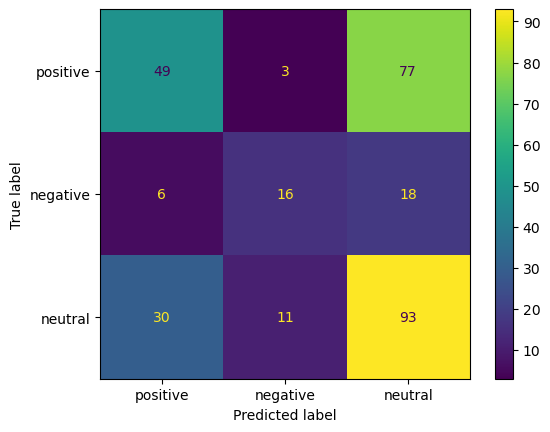

0.5214521452145214


In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
confusion_mat = confusion_matrix(cleanedData['Studium_Label'], cleanedData['SentimentPrediction'], labels=['positive', 'negative', 'neutral'])

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['positive', 'negative', 'neutral'])
disp.plot()
plt.show()
print(f1_score(cleanedData['Studium_Label'], cleanedData['SentimentPrediction'], labels=['positive', 'negative', 'neutral'], average='micro'))